In [1]:
from EnergyProfiler import PowerZone,Profiler

# Profile and save

## Power zone

Init a `list` of `PowerZone`, the constructor get the rapl interface as argument.

In [26]:
powerzones=[PowerZone("/sys/class/powercap/intel-rapl:0"),
            PowerZone("/sys/class/powercap/intel-rapl:1"),
            PowerZone("/sys/class/powercap/intel-rapl:0:1")]
print("Initialized power zone:")
for zone in powerzones:
    print(f"\t{zone}")

Initialized power zone:
	package-0 42525961750 uj
	psys 213672324457 uj
	uncore 1561427277 uj


## Profiler
Attach the `Profiler` to the `powerzones` list, setup the profile `time` in seconds`[s]` and timestep `dt` in seconds `[s]`.

In [27]:
profiler=Profiler(powerzones,time=100,dt=0.1)
print(profiler)

Profile time: 100 s, N* samples 1000, dt 0.1 s
Zones:
	package-0
	psys
	uncore



### Start profiling
Start the profiler and wait till the `return`.

In [28]:
profiler.start()

### Visualize 
Once the `Profiler` has finish his job, we are ready to visualize the result:

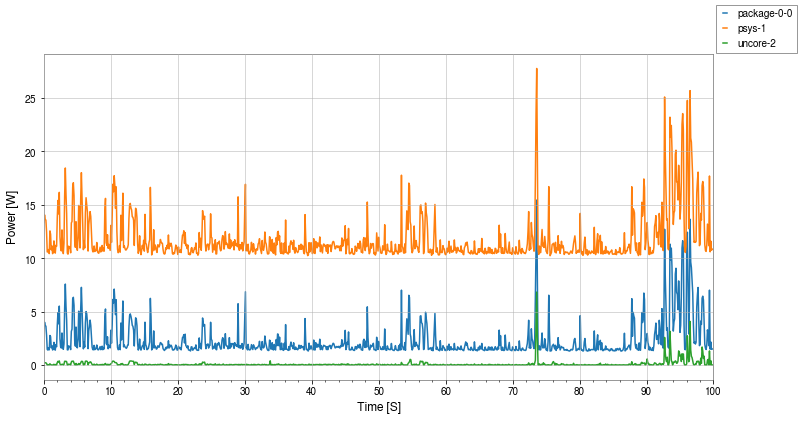

In [29]:
profiler.plot()

### Save
We are ready to save it using `hdf5` format. 

In [32]:
profiler.save("energy_data.hdf5")

### Metadata
If desired, enrich the data with additional metadata, using the static method `metadata_apply`.

In [35]:

metadata= { "cpu":"Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz",
"cores":12,
"socket":2,
"memory_size":"768",
"memory_type":"DDR4 2666 MT/s",
"interface":"intel-rapl",
"os":"Fedora 37",
"software":"my benchmark"}

profiler.metadata_apply("energy_data.hdf5",metadata)

### Load another energy profile from file
Is possible to load another energy profile from file, the file contain all stuff to plot and describe the data. 

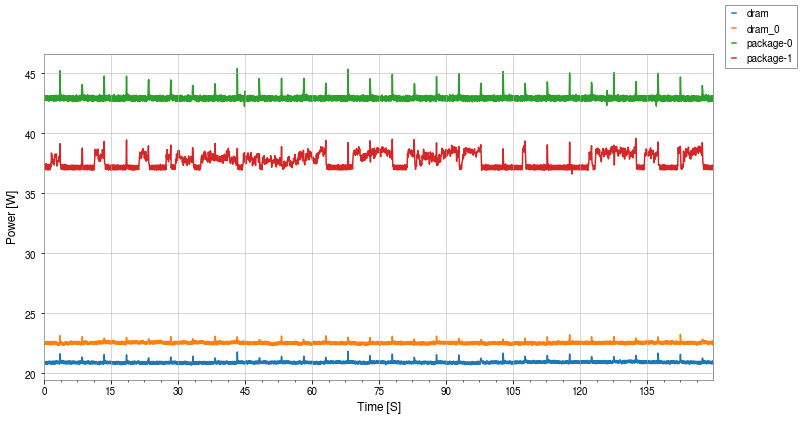

In [37]:
profiler=Profiler()
profiler.load_profile("thin007_idle.hdf5")
profiler.plot()